# **Деревья решений. Контрольное задание**

# **1. Подготовка исходных данных**

Сгенерировать исходные данные для обучения модели дерева решений.

Значения параметров выбираются из таблицы "Варианты".docx в соответствие с номером студента в списке группы в СДО.

Для задачи регрессии.

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 542,
                       n_features = 2,
                       n_informative = 1,
                       noise = 10.3,
                       random_state = 10)

Разделить выборку на обучающую и тестовую.

Доля объектов в тестовой выборке - 0,3.

Использовать параметр `random_state` в соответствие со своим вариантом.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 10)

X_train

array([[-1.13469532, -0.80779633],
       [-1.51507568, -0.53871853],
       [ 0.91093239, -0.89547524],
       [ 0.56816708, -1.16946767],
       [ 2.2048857 , -0.45208929],
       [ 0.45206723,  0.29406926],
       [-0.14990615, -0.03532806],
       [-2.81506131, -0.8213783 ],
       [-0.06191621, -1.05884829],
       [-1.98710415, -0.64083229],
       [ 0.10943326,  0.21527794],
       [-0.74182484,  1.10557514],
       [ 0.71195902,  0.91826915],
       [-0.95353242,  0.58804059],
       [ 1.39781939,  0.12466678],
       [-0.99263248, -0.68234147],
       [ 0.81828683,  0.2005007 ],
       [-0.49942025, -0.2710179 ],
       [-1.12310404, -0.38872795],
       [-0.74148923,  0.79374125],
       [-0.39021786,  0.64245062],
       [-0.38547682,  1.56020878],
       [-0.46598389,  0.06776726],
       [ 1.57855328,  1.19618007],
       [-2.29510333, -1.19592931],
       [-0.88346099,  1.15805157],
       [ 0.41961402, -0.31533228],
       [ 1.12878515, -0.69781003],
       [ 0.39672599,

# **2. Обучение модели**

Вычислить количество вопросов, которое необходимо проанализировать в корневом узле дерева решений для его разделения.

In [4]:
2 * (len(X_train)- 1)

756

Обучить модель дерева решений на тренировочной выборке с гиперпараметрами по умолчанию.

In [5]:
from sklearn.tree import DecisionTreeRegressor
tree_regr = DecisionTreeRegressor()
tree_regr.fit(X_train, y_train)

DecisionTreeRegressor()

Визуализировать полученное дерево.

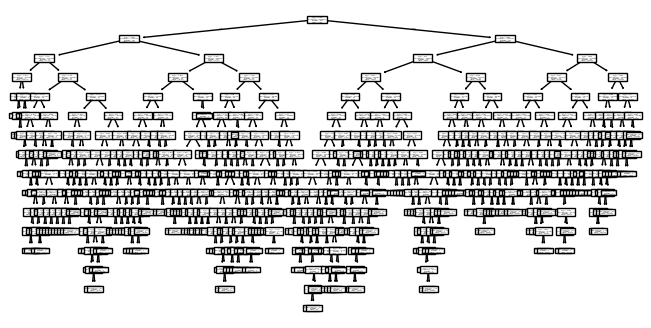

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (8,4))
plot_tree(tree_regr);

Вывести количество уровней (глубину) дерева.

In [7]:
tree_regr.get_depth()

15

Вывести количество листев дерева.

In [8]:
tree_regr.get_n_leaves()

np.int64(379)

Визуализировать полученное дерево с отображением одного уровня.

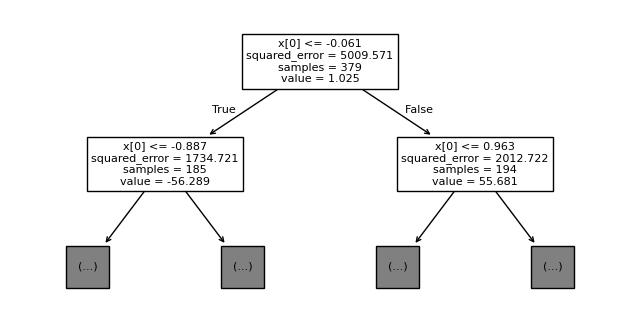

In [9]:
plt.figure(figsize = (8,4))
plot_tree(tree_regr,
          max_depth = 1);


С использованием выражений, рассмотренных в лекции 4, вычислить прирост информации для вопроса, который был выбран в корневом узле.

In [10]:
import numpy as np

def mse(y):
    return np.mean((y - np.mean(y)) ** 2)

def information_gain(y, y_left, y_right):
    n = len(y)
    return mse(y) - (len(y_left) / n) * mse(y_left) - (len(y_right) / n) * mse(y_right)

y = y_train

y_left = y_train[X_train[:, 0] <= -0.0613]
y_right = y_train[X_train[:, 0] > -0.0613]

gain_chosen = information_gain(y, y_left, y_right)
print(f"Прирост информации: {gain_chosen:.4f}")

Прирост информации: 3132.5486


С использованием выражений, рассмотренных в лекции 4, вычислить прирост информации для любого альтернативного вопроса в корневом узле и сравнить полученные значения.

In [11]:
y_left_alt = y_train[X_train[:, 0] <= 0.0]
y_right_alt = y_train[X_train[:, 0] > 0.0]


gain_alternative = information_gain(y, y_left_alt, y_right_alt)
print(f"Прирост информации для альтернативного вопроса: {gain_alternative:.4f} \n")

print(f"Выбранный вопрос:   {gain_chosen:.4f}")
print(f"Альтернативный:     {gain_alternative:.4f}")
print(f"Разница:            {gain_chosen - gain_alternative:.4f}")

Прирост информации для альтернативного вопроса: 3118.4513 

Выбранный вопрос:   3132.5486
Альтернативный:     3118.4513
Разница:            14.0973


# **3. Оценивание качества модели**

**Для задачи регрессии**:

Вычислить метрики MSE и R2 для обучающей и тестовой выборок.

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = tree_regr.predict(X_train)
y_test_pred = tree_regr.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
R2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
R2_test = r2_score(y_test, y_test_pred)

print(f"Обучающая: \n MSE: {mse_train}, R2: {R2_train}")
print(f"Тестовая: \n MSE: {mse_test}, R2: {R2_test}")

Обучающая: 
 MSE: 0.0, R2: 1.0
Тестовая: 
 MSE: 167.15678411045403, R2: 0.9625536764072234


Сделать вывод о качестве модели.

# **4. Использование модели для предсказания**

Задать произвольный объект и определить:
- для задачи регрессии - прогнозное значение целевого признака.

In [13]:
X_new = [[ -0.7, 1.4]]
y_predicted = tree_regr.predict(X_new)
y_predicted

array([-41.67424921])